# PSM for tree TRW (VS-Lite)

In this tutorial, we introduce the PSM for tree TRW (VS-Lite) in `cfr`.

In [1]:
%load_ext autoreload
%autoreload 2

import cfr

## Data preparation

### Proxy

In [2]:
pdb = cfr.ProxyDatabase().fetch('PAGES2kv2')

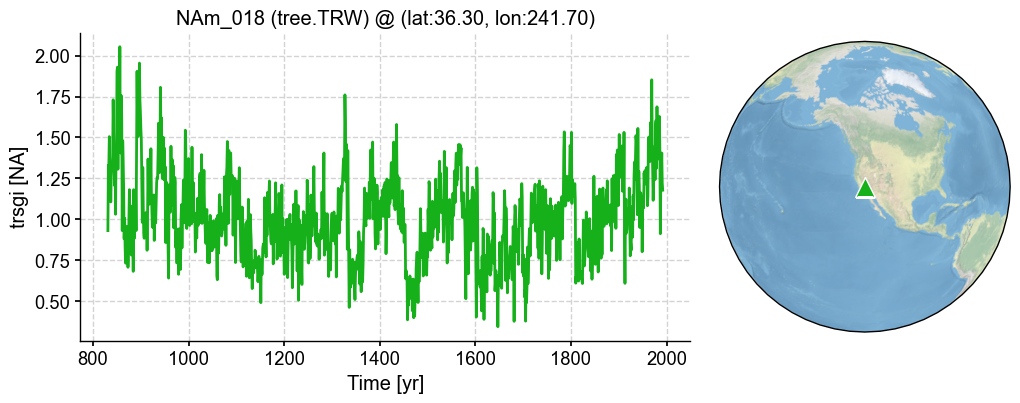

In [3]:
pobj = pdb.records['NAm_018']
fig, ax = pobj.plot()

### Model

In [4]:
model_tas = cfr.ClimateField().fetch('iCESM_past1000historical/tas')
model_pr = cfr.ClimateField().fetch('iCESM_past1000historical/pr')

>>> The target file seems existed at: ./data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc . Loading from it instead of downloading ...
>>> The target file seems existed at: ./data/pr_sfc_Amon_iCESM_past1000historical_085001-200512.nc . Loading from it instead of downloading ...


In [5]:
model_tas.da

<xarray.DataArray 'tas' (time: 13872, lat: 96, lon: 144)>
[191766528 values with dtype=float32]
Coordinates:
  * time     (time) object 0850-01-17 00:00:00 ... 2005-12-17 00:00:00
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:  Reference height temperature
    units:      K

### Instrumental observation

In [6]:
obs_tas = cfr.ClimateField().fetch('CRUTSv4.07/tas', vn='tmp')
obs_pr = cfr.ClimateField().fetch('CRUTSv4.07/pr', vn='pre')

>>> The target file seems existed at: ./data/cru_ts4.07.1901.2022.tmp.dat.nc.gz . Loading from it instead of downloading ...
>>> The target file seems existed at: ./data/cru_ts4.07.1901.2022.pre.dat.nc.gz . Loading from it instead of downloading ...


In [7]:
obs_pr = obs_pr.rename('pr')
obs_tas = obs_tas.rename('tas')

## Get climate data for a specific `ProxyRecord`

In [11]:
%%time

pobj.del_clim()
pobj.get_clim(model_tas, tag='model')
pobj.get_clim(model_pr, tag='model')
pobj.get_clim(obs_tas, tag='obs')
pobj.get_clim(obs_pr, tag='obs')

CPU times: user 8.01 ms, sys: 152 ms, total: 160 ms
Wall time: 1.23 s


In [13]:
pobj.clim['obs.tas'].da

<xarray.DataArray 'tas' (time: 1464)>
array([ 0.8       ,  0.90000004,  2.2       , ..., 11.1       ,
        1.7       ,  0.3       ], dtype=float32)
Coordinates:
    lon      float32 241.8
    lat      float32 36.25
  * time     (time) object 1901-01-16 00:00:00 ... 2022-12-16 00:00:00
Attributes:
    long_name:                   near-surface temperature
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0

## Create a PSM object

In [14]:
mdl = cfr.psm.VSLite(pobj)

In [15]:
%%time

mdl.calibrate()  # octave is required. For example, to install on macOS: `brew install octave`
print(mdl.calib_details)


    _pyeval at line 57 column 30




Working on chain 1 out of 3...
Working on chain 2 out of 3...
Working on chain 3 out of 3...
    estimate_vslite_params_v2_3 at line 456 column 9
    _pyeval at line 57 column 30

    estimate_vslite_params_v2_3 at line 457 column 9
    _pyeval at line 57 column 30

    estimate_vslite_params_v2_3 at line 458 column 9
    _pyeval at line 57 column 30

    estimate_vslite_params_v2_3 at line 459 column 9
    _pyeval at line 57 column 30

    estimate_vslite_params_v2_3 at line 461 column 13
    _pyeval at line 57 column 30

    estimate_vslite_params_v2_3 at line 466 column 9
    _pyeval at line 57 column 30

    Rhat for T1, T2, M1, M2, sigma2rw:
   1.0000   1.0022   1.0016   1.0004   1.0119
{'T1': 5.661133563105939, 'T2': 18.10182563306548, 'M1': 0.0352692544593921, 'M2': 0.27955590028116684, 'Rhats': array([[1.00001939, 1.00215255, 1.00161344, 1.00035685, 1.01190535]]), 'convwarning': 0.0}
CPU times: user 36 ms, sys: 37.9 ms, total: 73.9 ms
Wall 

In [16]:
%%time
pp = mdl.forward()

CPU times: user 181 ms, sys: 4.46 ms, total: 185 ms
Wall time: 184 ms


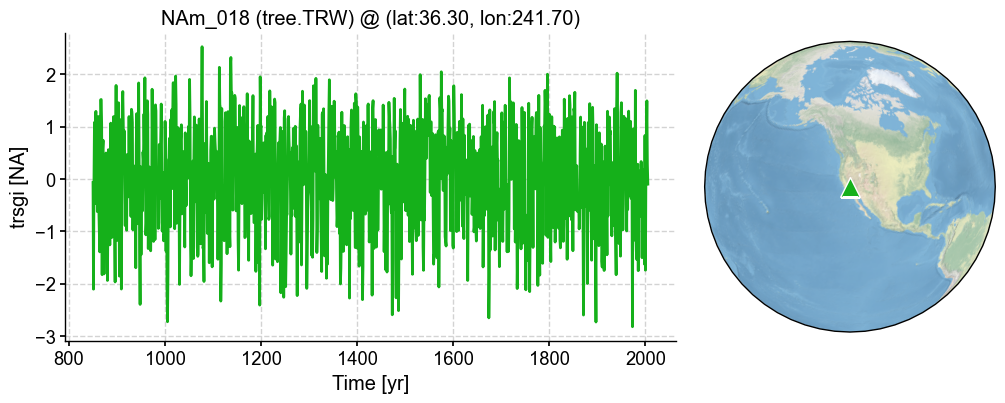

In [17]:
fig, ax = pp.plot()